## Visualization of Tibet dynamic model
### D. Li, 24.1.2022
#### Modified by J. Hayek, 09.02.22

In [1]:
# initialize and load modules
#%matplotlib notebook
from pythonXdmfReader.pythonXdmfReader import*
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('science')

import matplotlib.tri as tri
import pyproj
import scipy.io as sio
from palettable.scientific import sequential as cmapa
from matplotlib import colors, cm

from scipy.io import netcdf_file as netcdf


import rasterio
from rasterio.plot import show
import numpy as np
import os

from Lib_GeneralFunctions import *

print('module loaded')

module loaded


In [2]:
#Plot fontsize controller
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18
FontSizeControlFreak(SMALL_SIZE,MEDIUM_SIZE,BIGGER_SIZE)

# Surface displacement plot

In [3]:
def Plot_SurfaceDisp(Band, Raster, Vmin, Vmax, cbarLabel, fig, ax, cmap):
    ##
    # Use of rasterio's show() function for each raster band to
    # include the correct map projection following the data's CRS
    
    show(Band, ax=ax, transform=Raster.transform, cmap=Cmap, vmin=Vmin, vmax=Vmax) 
    cbar = fig.colorbar(cm.ScalarMappable(norm = colors.Normalize(vmin=Vmin, vmax=Vmax), cmap=Cmap), 
                        ax=ax, pad=0.01)
    cbar.set_label(cbarLabel)
    

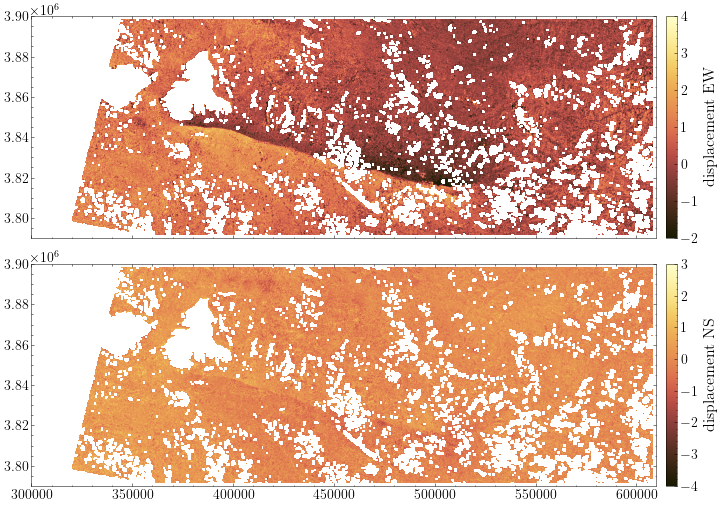

In [4]:
TiffFigure = "InData/disp_ewns.tif"
raster = rasterio.open(TiffFigure)
fig, (ax1, ax2) = plt.subplots(ncols=1, nrows=2, figsize=(14,7), sharex=True, constrained_layout=True)

Band1 = raster.read(1) # displacement EW saved in raster band 1
Band2 = raster.read(2) # displacement NS saved in raster band 2

Cmap = cmapa.LaJolla_20_r.mpl_colormap


Plot_SurfaceDisp(Band1, Raster=raster, Vmin = -2, Vmax = 4, cbarLabel = 'displacement EW',
                 fig=fig, ax=ax1, cmap=Cmap)

Plot_SurfaceDisp(Band2, Raster=raster, Vmin = -4, Vmax = 3, cbarLabel = 'displacement NS',
                 fig=fig, ax=ax2, cmap=Cmap)

### Raster's CRS

EPSG:32647
WGS 84 / UTM zone 47N, units: metres

In [5]:
raster.crs

CRS.from_epsg(32647)

## Inferred horizontal surface displacements from correlation optical images

#### Inspired on the plot from Ulrich et al. 2019 to compare against the modeled horizontal displacement field

In [6]:
# Undersampling step for quiver
step = 110
cols, rows = np.meshgrid(np.arange(0,raster.shape[1],step, dtype=int), 
                         np.arange(0,raster.shape[0],step, dtype=int))

# Get lat lon wrt raster CRS
xs, ys = rasterio.transform.xy(raster.transform, rows, cols)
lons= np.array(xs)
lats = np.array(ys)


# Quiver plot over Band 1 plot
fig, ax1 = plt.subplots(ncols=1, nrows=1, figsize=(16,4))

Plot_SurfaceDisp(Band1, Raster=raster, Vmin = -2, Vmax = 4, cbarLabel = 'displacement EW',
                 fig=fig, ax=ax1, cmap=Cmap)

# Undersampled quiver
ax1.quiver(lons,lats,Band1[0:-1:step,0:-1:step],Band2[0:-1:step,0:-1:step])



In [7]:
### Done with raster handling, clean up a bit
del raster, Band1, Band2, lons, lats

# Plot moment rate against time


In [8]:
def PlotMomentRate(ModelFolder,modelname):
    ## plot moment rate with time

    fin = open(ModelFolder+modelname+'-EnF_0t-all.dat','r') ## Concat file after postprocessing all the Enf files
    enf = np.loadtxt(fin,comments='#',skiprows=1); # Moment rate output

    mfile='STF_usgs.txt' # Source time function from the USGS, located in the same folder as the notebook
    fin2 = open(mfile,'r');
    mr = np.loadtxt(fin2);


    #%%%%%%%%% Plotting + units conversion to compare against USGS
    plt.figure(figsize=(6,5))

    #plt.subplot(1,2,1)               
    plt.plot(enf[:,0],enf[:,1]*1e7/1e25,'-r')   # from MPa*m**2/s to dyne-cm/s
    plt.plot(mr[:,0],mr[:,1]/1e18,'-k')
    plt.legend(['this study','USGS'])

    plt.xlabel('time (s)')
    plt.ylabel('moment rate/1e19 (Nm/s)')
    plt.xlim([0,50])
    plt.ylim([0,10])


    # seismic moment magnitude
    moment0 = 0.0
    M0 = np.trapz(enf[:,1], x=enf[:,0]) # Trapezoidal rule for integration

    mag  = 2/3*np.log10(M0)-6.07 # Conversion to moment magnitude for the title

    plt.title('model = '+ modelname +'| Mw:'+str(round(mag,2)))

## Setup folder and model


model = L001


(-0.5, 8.0)

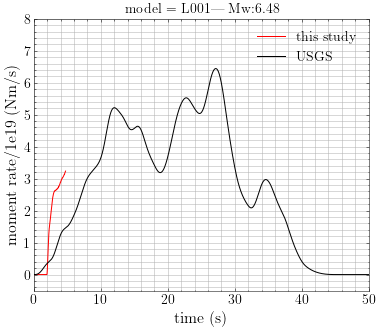

In [18]:
ModelFolder = '/import/freenas-m-05-seissol/jhayek/EQ_Seissol/Qinghai/Output/'
# model name
modelname = 'L001'
print('model = '+ modelname)
PlotMomentRate(ModelFolder,modelname)
plt.grid(True, which='both')
plt.ylim([-.5,8])

model = G100


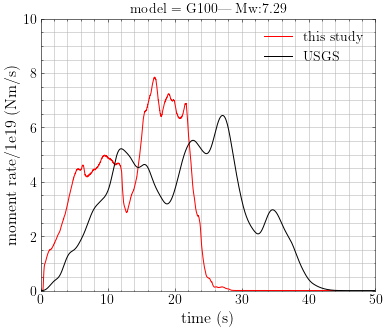

In [13]:
ModelFolder = '/import/freenas-m-05-seissol/jhayek/Data_SupNG/Qinghai/'
# model name
modelname = 'G100'
print('model = '+ modelname)
PlotMomentRate(ModelFolder,modelname)
plt.grid(True, which='both')

#### Saved models' input parameters can be found at the project folder:

/pr63qo/ru42row3/SeisSol2022/PlaceHolder/OLD_MODELS/.

In [1]:
PlotMomentRate(ModelFolder,"G56")
plt.grid(True, which='both')

PlotMomentRate(ModelFolder,"G95")
plt.grid(True, which='both')

PlotMomentRate(ModelFolder,"G96")
plt.grid(True, which='both')

#plt.savefig(modelname+'-mag.png',dpi=300)

NameError: name 'PlotMomentRate' is not defined

In [18]:
PathNFile_= ModelFolder+"*-EnF_0t-all.dat"
FileList_ = glob(PathNFile_)
list_ = [i.replace(PathNFile_.split('*')[0],'').replace(PathNFile_.split('*')[1],'') for i in FileList_]
list_.sort()
list_.remove("G37")

/import/freenas-m-02-seismology/jhayek/miniconda3/envs/Seissol/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]


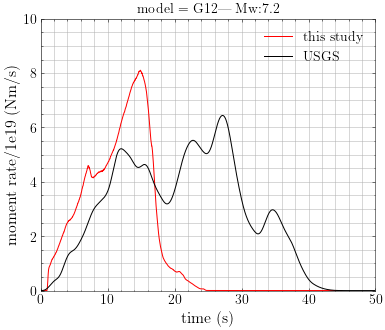

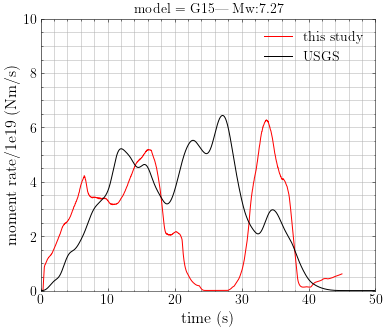

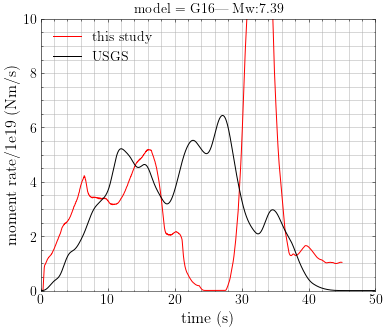

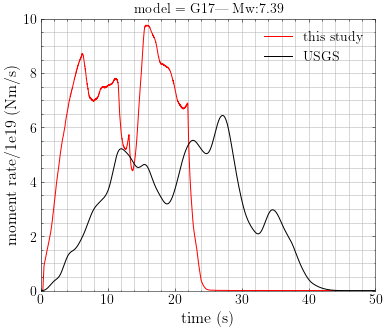

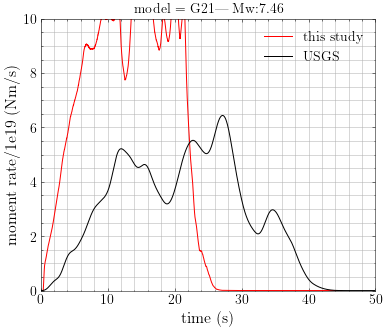

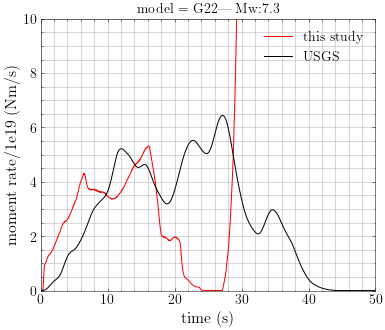

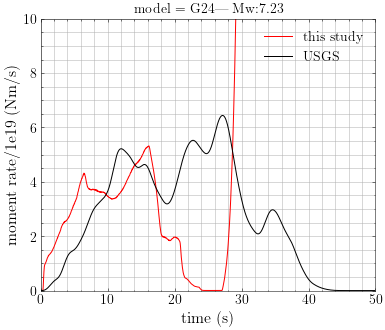

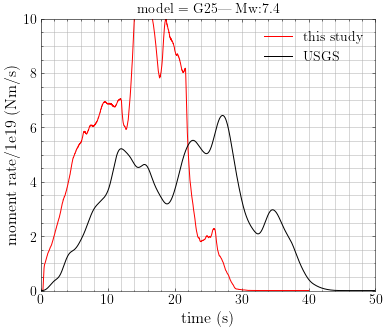

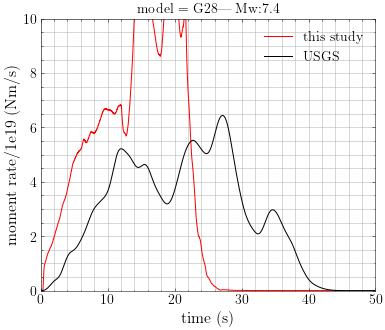

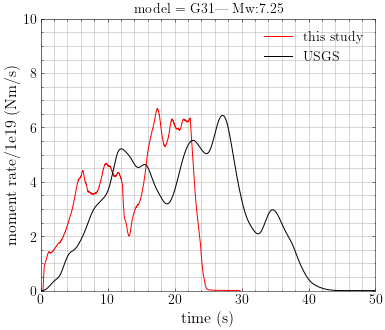

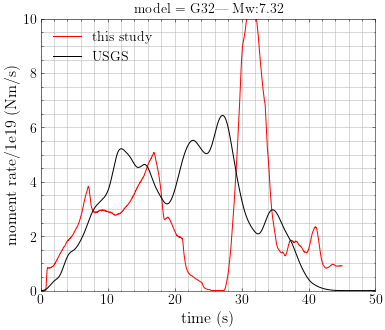

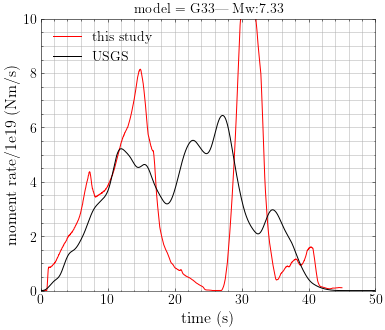

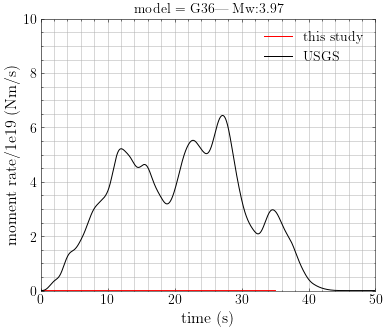

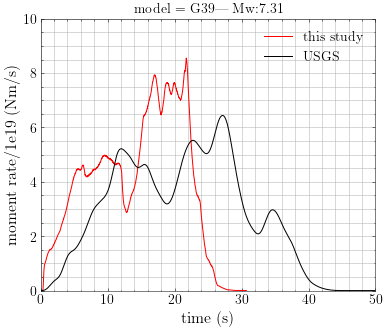

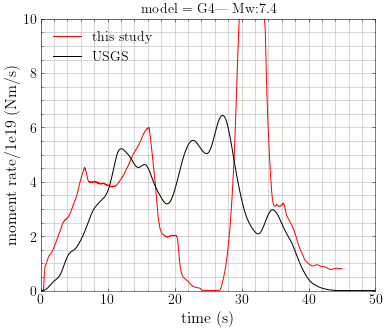

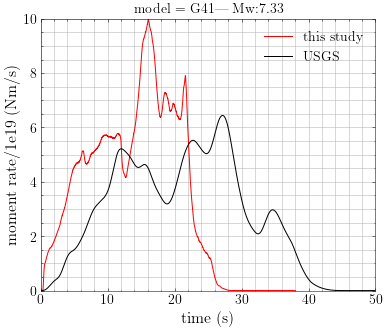

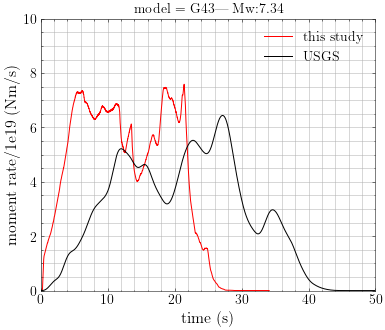

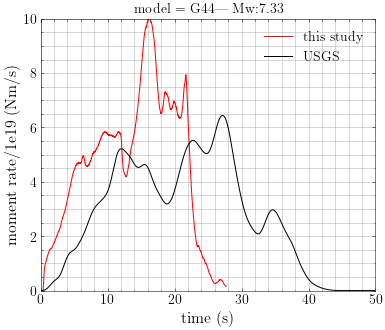

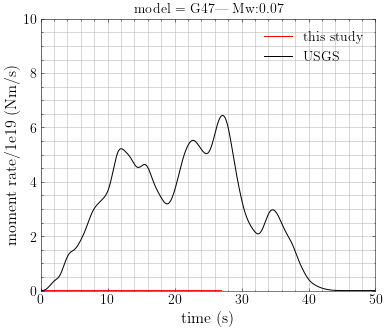

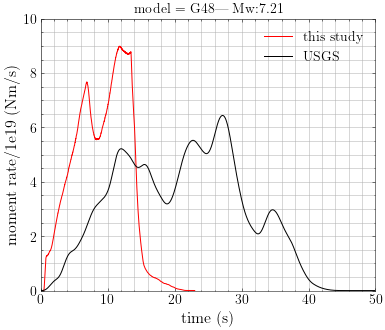

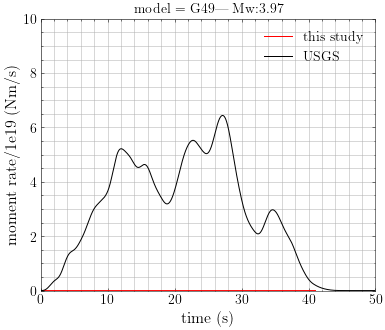

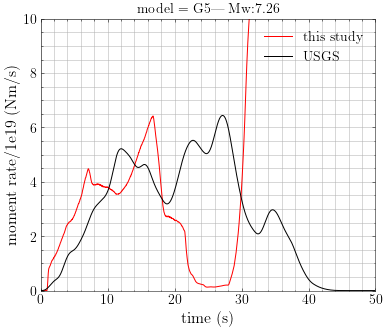

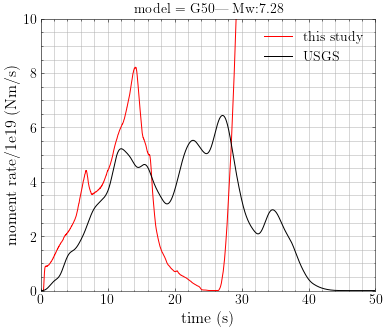

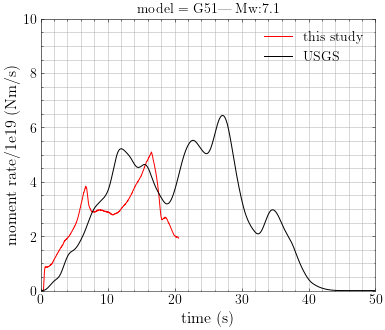

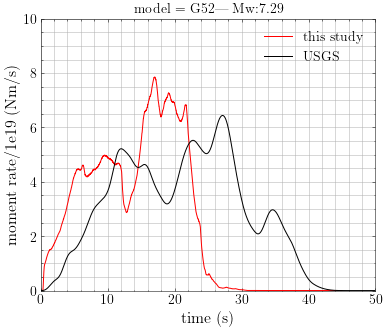

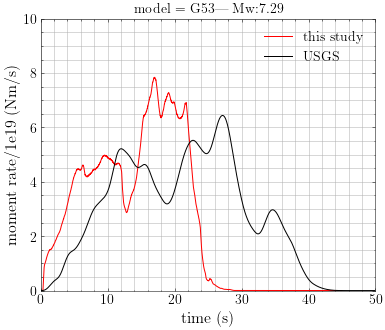

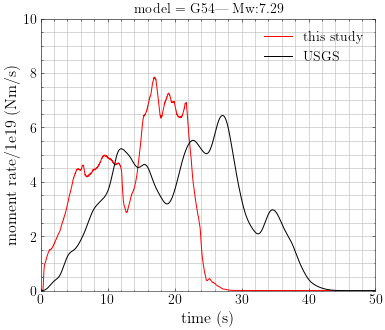

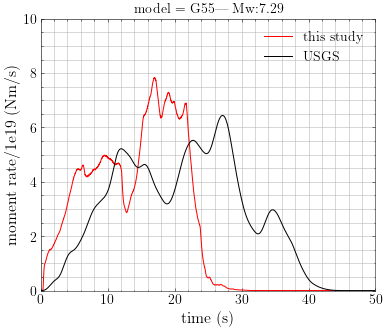

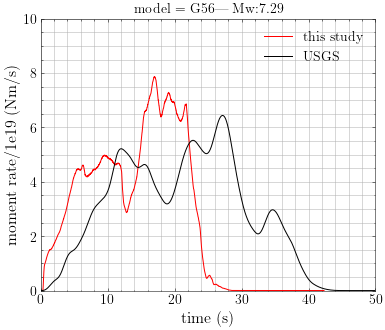

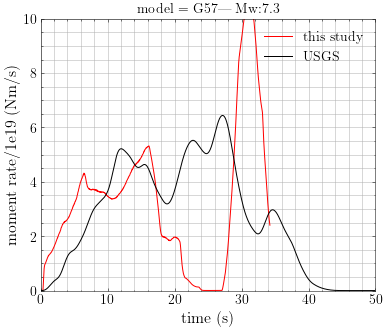

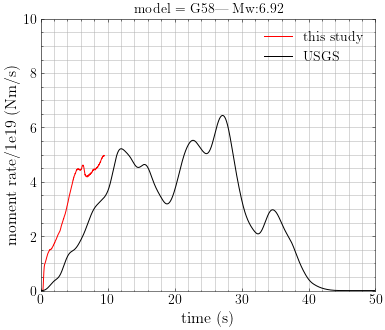

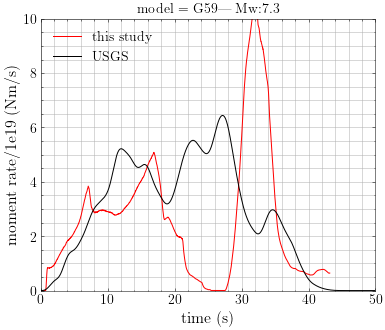

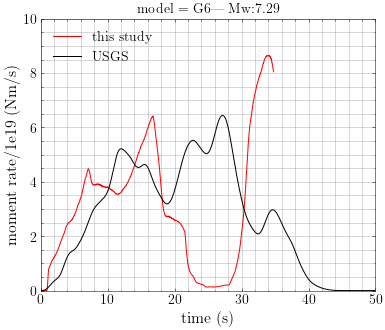

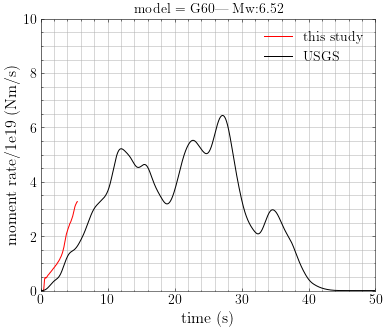

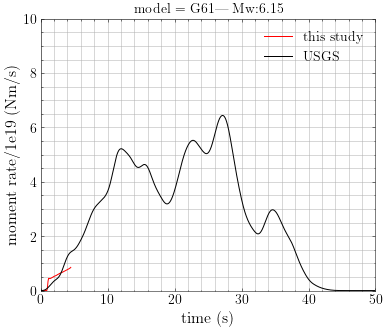

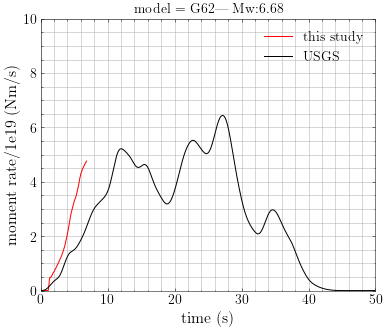

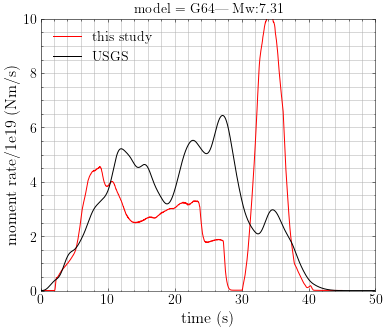

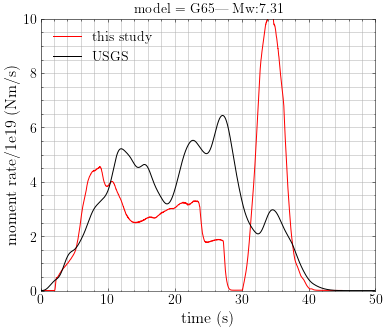

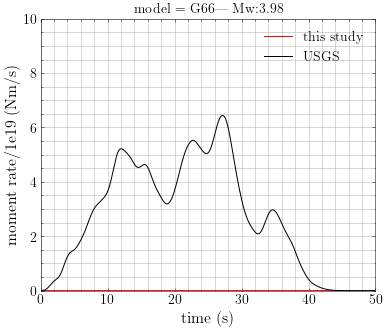

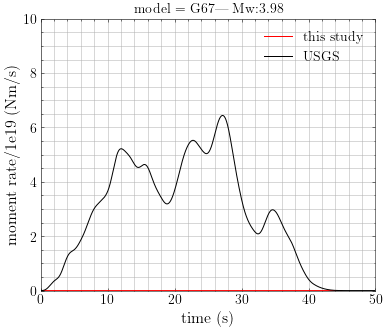

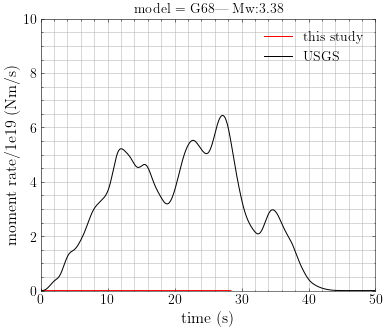

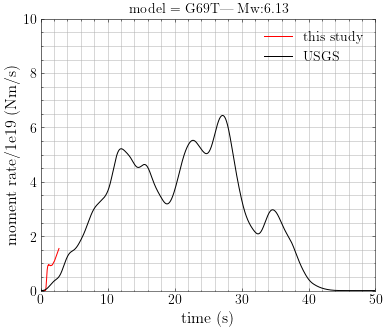

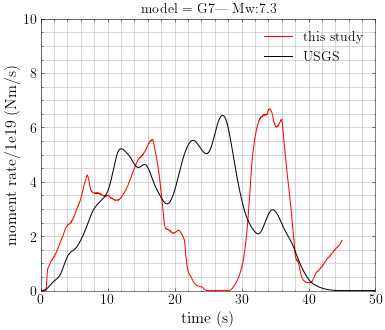

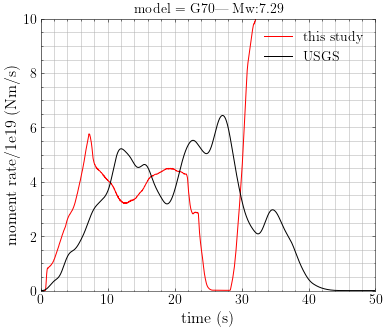

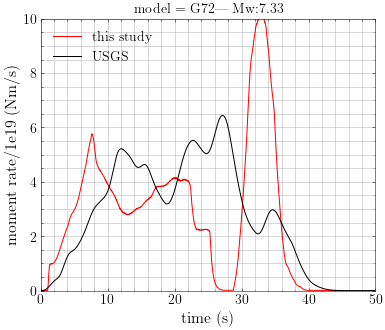

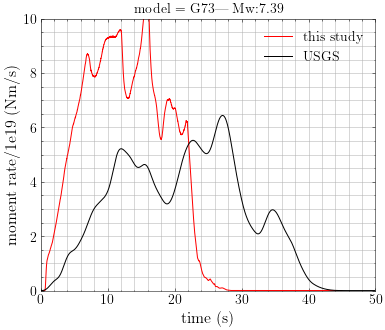

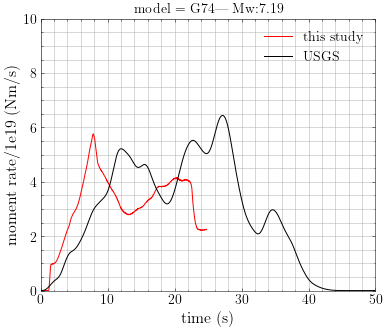

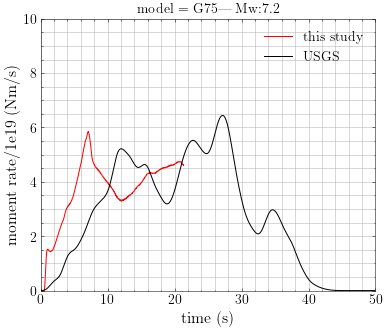

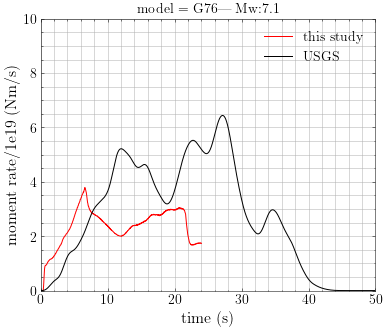

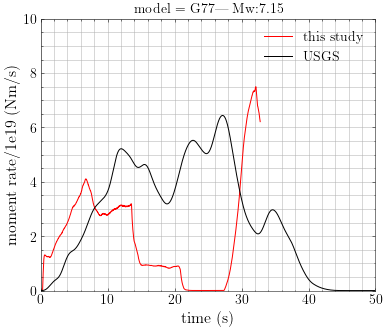

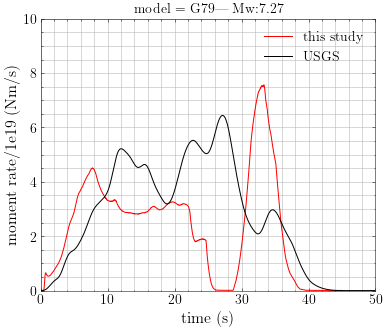

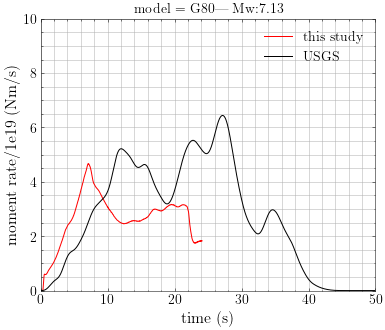

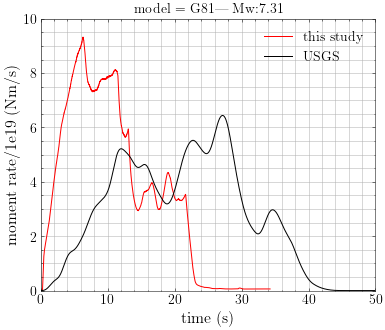

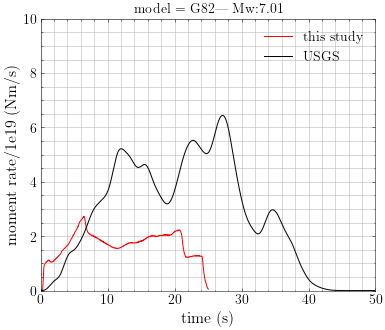

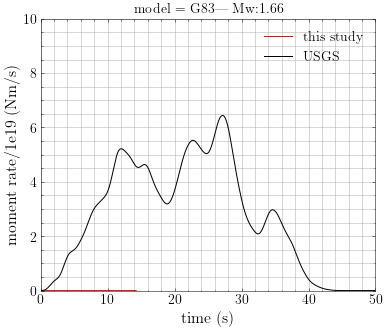

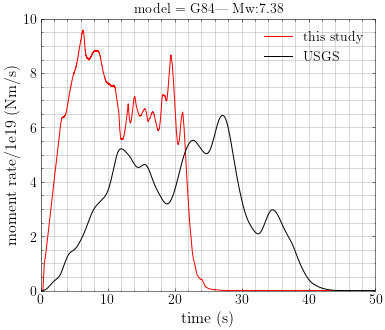

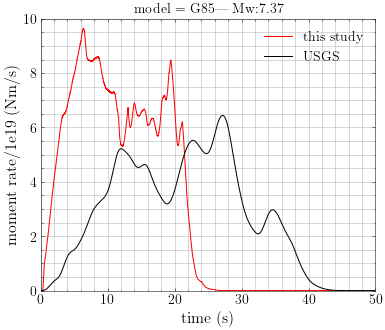

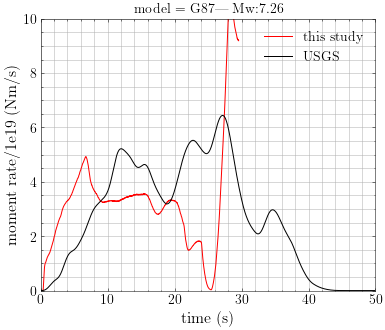

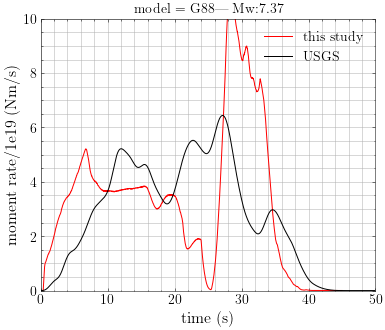

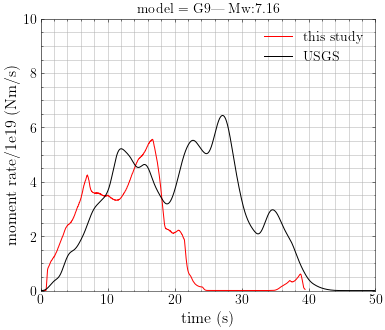

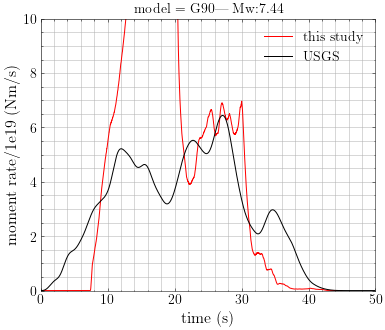

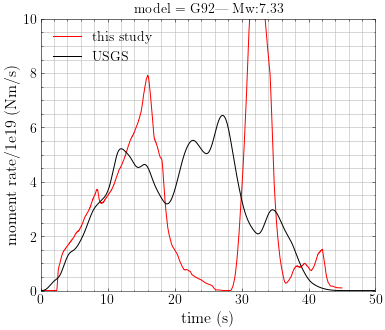

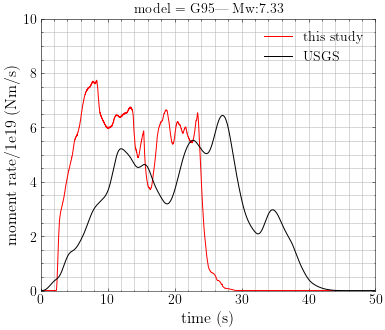

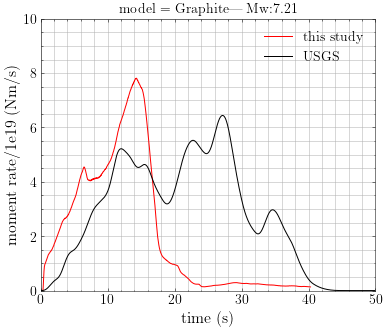

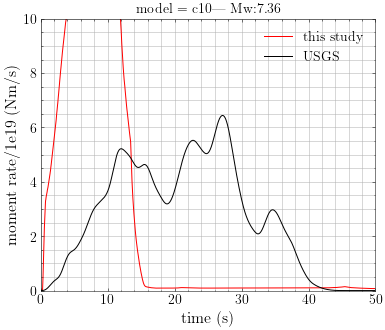

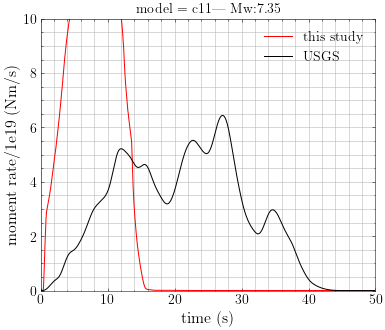

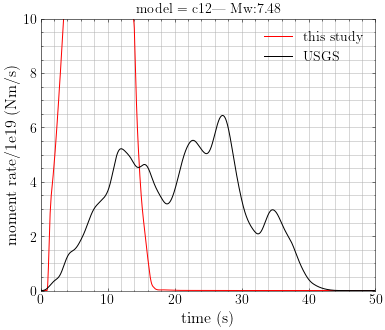

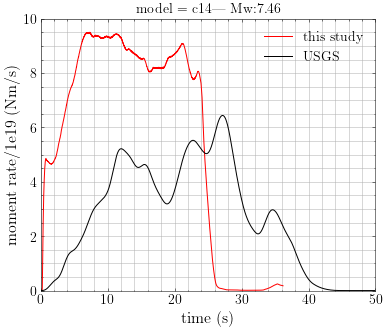

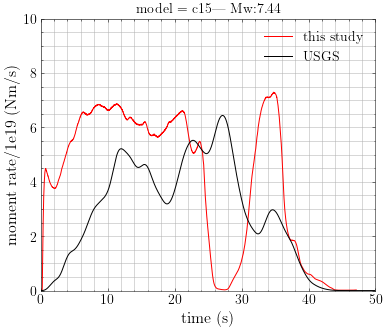

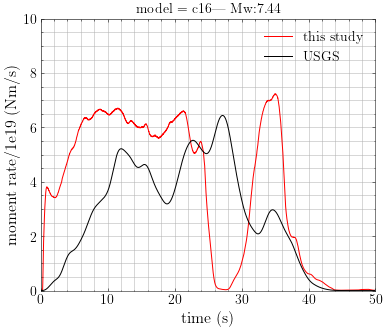

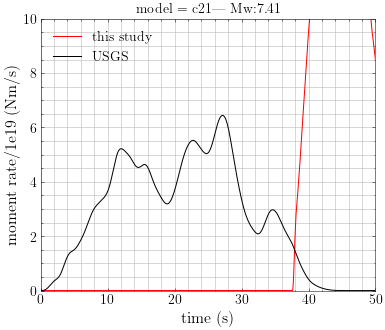

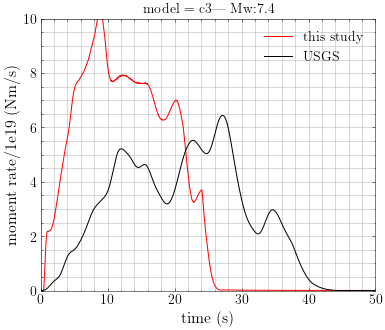

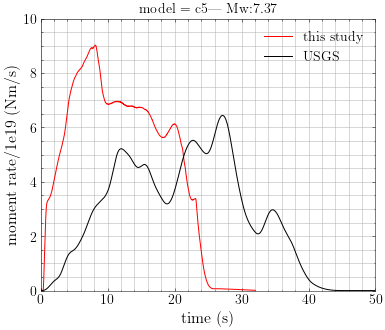

In [19]:
for i in list_:
    PlotMomentRate(ModelFolder,i)
    plt.grid(True, which='both')

#### Plot of rupture velocity and slip

In [20]:
# load data

lla = pyproj.Proj(proj='latlong', ellps='WGS84', datum='WGS84')
myproj = pyproj.Proj(proj='lcc', init='EPSG:3415')

xdmfFilename = ModelFolder + modelname+'-fault.xdmf'

hypoll = np.loadtxt('/import/freenas-m-05-seissol/dli/Qinghai/' + 'hypocenters.dat')

#lla = pyproj.Proj(proj='latlong', ellps='WGS84', datum='WGS84')
#myproj = pyproj.Proj(proj='geocent',init='EPSG:5936',ellps='WGS84', datum='WGS84')

ndt = ReadNdt(xdmfFilename)-2
xyz = ReadGeometry(xdmfFilename)
connect = ReadConnect(xdmfFilename)

#ncst = pyproj.transform(lla, myproj, coast['data'][:,0],coast['data'][:,1], radians=False)
#hypoxyz =  pyproj.transform(lla, myproj,hypoll[:,0],hypoll[:,1],radians=False)
d = 101.0/180.0*np.pi
triang = tri.Triangulation((xyz[:,0]/1e3-hypoll[0]/1e3)/np.sin(d),xyz[:,2]/1e3,connect)

#%%
asl= LoadData(xdmfFilename,'ASl',connect.shape[0],idt=ndt-1,oneDtMem=True,firstElement=-1)
vr =LoadData(xdmfFilename,'Vr',connect.shape[0],idt=ndt-1,oneDtMem=True,firstElement=-1)
td = LoadData(xdmfFilename,'T_d',connect.shape[0],idt=ndt-1,oneDtMem=True,firstElement=-1)
# srd=LoadData(xdmfFilename,'PSR',connect.shape[0],idt=ndt-1,oneDtMem=True,firstElement=-1)
#%%

fig=plt.figure(figsize=(18,6.0))


#ax0.set_title('Mapview of Td0')
ax0 = fig.add_subplot(2, 1, 1)
sc = ax0.tripcolor(triang,asl[0],cmap='turbo',vmin=0.0,vmax=12.0)
ax0.set_xlabel('')
ax0.set_ylabel('depth (km)')

cl = fig.colorbar(sc,ax=ax0)
cl.set_label('slip (m)')

ax0 = fig.add_subplot(2, 1, 2)
sc = ax0.tripcolor(triang,vr[0],cmap='plasma',vmin=0.0,vmax=3500.0)
ax0.set_xlabel('distance (km)')
ax0.set_ylabel('depth (km)')
cl = fig.colorbar(sc,ax=ax0)
cl.set_label('rupture velocity (m/s)')

outname = modelname+'-slp-vr.png'
#plt.savefig(outname,dpi=100,transparent=False)


FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = '/import/freenas-m-05-seissol/jhayek/Data_SupNG/Qinghai/G96-fault_vertex.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
## plot slip and rupture speed
# load data for snapshot
srd1= LoadData(xdmfFilename,'SRd',connect.shape[0],idt=8,oneDtMem=True,firstElement=-1)
srd2= LoadData(xdmfFilename,'SRd',connect.shape[0],idt=16,oneDtMem=True,firstElement=-1)
srd3= LoadData(xdmfFilename,'SRd',connect.shape[0],idt=30,oneDtMem=True,firstElement=-1)
srd4 =LoadData(xdmfFilename,'SRd',connect.shape[0],idt=42,oneDtMem=True,firstElement=-1)
srd5 =LoadData(xdmfFilename,'SRd',connect.shape[0],idt=54,oneDtMem=True,firstElement=-1)

# srd6 =LoadData(xdmfFilename,'SRd',connect.shape[0],idt=int(5*ndt/6),oneDtMem=True,firstElement=-1)

In [ ]:
srd2


In [ ]:
max(srd2[0])

In [ ]:
# plot snapshots of slip rate
fig,([ax0,ax1],[ax2,ax3]) = plt.subplots(nrows=2,ncols=2,figsize=(6,5.5))

#%%%% Selection of colorbar limits
Vmax=max(srd2[0]);Vmin=min(srd2[0])
print("Vmax={}; Vmin={}".format(Vmax,Vmin))
Vmax=1;Vmin=0
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

sc = ax0.tripcolor(triang,srd2[0],cmap='magma_r',shading='flat',vmin=Vmin,vmax=Vmax)
#cl = fig.colorbar(sc,ax=ax0)
#ax0.set(xlim=(-102.5, -99.5),ylim=(16,18.5))
#ax0.plot(coast['ncst'][:,0],coast['ncst'][:,1],'-k',markersize=0.1)
# ax0.contour(X,Y,coslp,levels=[8,16],colors='w')
ax0.xaxis.set_ticklabels([])
ax0.set_ylabel('latitude')
#ax0.plot(epi[:,0],epi[:,1],'*r',markersize=4.0)

sc = ax1.tripcolor(triang,srd3[0],cmap='magma_r',shading='flat',vmin=Vmin,vmax=Vmax)
#cl = fig.colorbar(sc,ax=ax1)
#ax1.set(xlim=(-102.5, -99.5),ylim=(16,18.5))
#ax1.plot(coast['ncst'][:,0],coast['ncst'][:,1],'-k',markersize=0.1)
ax1.xaxis.set_ticklabels([])
ax1.yaxis.set_ticklabels([])

# ax0.contour(X,Y,coslp,levels=[8,16],colors='w')

sc = ax2.tripcolor(triang,srd4[0],cmap='magma_r',shading='flat',vmin=Vmin,vmax=Vmax)
#cl = fig.colorbar(sc,ax=ax2)
#ax2.set(xlim=(-102.5, -99.5),ylim=(16,18.5))
#ax2.plot(coast['ncst'][:,0],coast['ncst'][:,1],'-k',markersize=0.1)
# ax0.contour(X,Y,coslp,levels=[8,16],colors='w')
ax2.set_xlabel('longitude')
ax2.set_ylabel('latitude')

sc = ax3.tripcolor(triang,srd5[0],cmap='magma_r',shading='flat',vmin=Vmin,vmax=Vmax)
#cl = fig.colorbar(sc,ax=ax3)
#ax3.set(xlim=(-102.5, -99.5),ylim=(16,18.5))
#ax3.plot(coast['ncst'][:,0],coast['ncst'][:,1],'-k',markersize=0.1)
# ax3.contour(X,Y,coslp,levels=[8,16],colors='w')
ax3.yaxis.set_ticklabels([])
ax3.set_xlabel('longitude')


fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.85,
                    wspace=0.1, hspace=0.1)
cb_ax = fig.add_axes([0.87, 0.1, 0.02, 0.8])
cbar = fig.colorbar(sc, cax=cb_ax)
cbar.set_label('slip rate (m/s)')

plt.show()
outname = modelname+'-snapshots.png'
#plt.savefig(outname,dpi=200,transparent=False)
